Import data

This model can be used to help businesses identify customer sentiment in relation to their products. Since the only input is a text review, the company could further gauge their customers feelings from comments; for example, on social media pages, blogs, and more in which star ratings are not readily available.

The final model is a linear regression that predicts low, average, and high reviews.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['font.size'] = 11

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 500)

Source: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [2]:
df=pd.read_csv('./clothingreviews.csv')

In [3]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",5,1,0,General,Dresses,Dresses


EDA

In [4]:
df.shape

(23486, 11)

In [5]:
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [6]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
df.dropna(subset=['Review Text'], inplace=True)

In [9]:
df.dropna(subset=['Department Name'], inplace=True)

In [10]:
#count words in each review

In [11]:
df['reviewWords'] = [len(x.split()) for x in df['Review Text'].tolist()]

In [12]:
#count total chars in each review

In [13]:
df['reviewChars'] = [len(x) for x in df['Review Text'].tolist()]

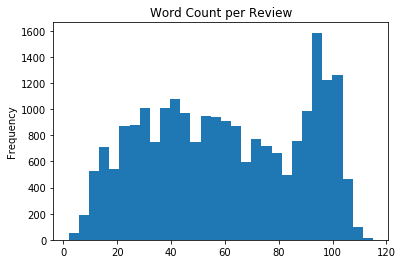

In [14]:
df['reviewWords'].plot.hist(bins=30,label='words');
plt.title('Word Count per Review');

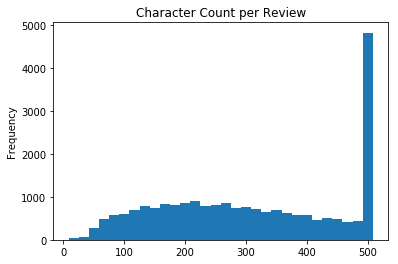

In [15]:
df['reviewChars'].plot.hist(bins=30, label='chars');
plt.title('Character Count per Review');

In [16]:
# from matplotlib.widgets import CheckButtons
# fig, ax = plt.subplots()
# his = [h1, h2]
# rax = plt.axes([0.05, 0.4, 0.1, 0.15])
# # get the labels for each plot
# labels = ['words','chars']
# # get the visibility for each plot
# visibility = [hi.get_visible() for hi in his]
# check = CheckButtons(rax, labels,visibility)

# # function to show the graphs based on checked labels
# def func(label):
#     index = labels.index(label)
#     lines[index].set_visible(not lines[index].get_visible())
#     plt.draw()

# # on click event call function to display graph
# check.on_clicked(func)

# plt.show()

In [17]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,reviewWords,reviewChars
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,8,53
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,98,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,0,4,General,Dresses,Dresses,98,488
6,6,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,1,General Petite,Tops,Knits,101,496
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,1,4,General Petite,Tops,Knits,97,482
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,1,0,General,Dresses,Dresses,34,166
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",5,1,0,General,Dresse

In [18]:
#these are the possible ratings
df['Rating'].unique()

array([4, 5, 3, 2, 1])

In [19]:
df['departmentValue']=df['Department Name'].map({"Intimate":1, "Dresses":2, "Bottoms":3, "Tops":4, "Jackets":5, "Trend":6})

In [20]:
df.rename(columns = {'Review Text':'reviewText', 'Department Name': 'departmentName'}, inplace = True) 

In [21]:
df.head(45)

,Unnamed: 0,Clothing ID,Age,Title,reviewText,Rating,Recommended IND,Positive Feedback Count,Division Name,departmentName,Class Name,reviewWords,reviewChars,departmentValue
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,8,53,1
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303,2
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,98,500,2
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,3
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,4
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,0,4,General,Dresses,Dresses,98,488,2
6,6,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,1,General Petite,Tops,Knits,101,496,4
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,1,4,General Petite,Tops,Knits,97,482,4
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,1,0,General,Dresses,Dresses,34,166,2
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric u

In [22]:
df['sentiment']=df['Rating'].map({1:0, 2:0, 4:2, 5:2, 3:1})

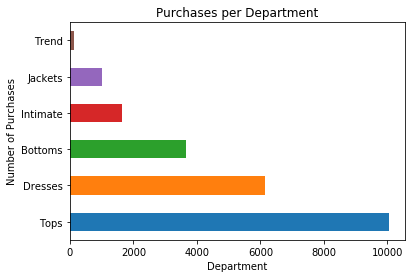

In [23]:
df['departmentName'].value_counts().plot(kind='barh')

plt.xlabel('Department');
plt.ylabel('Number of Purchases');
plt.title('Purchases per Department');

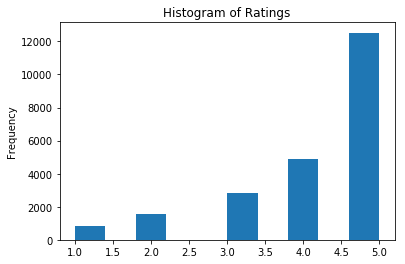

In [24]:
df['Rating'].plot.hist();

plt.title('Histogram of Ratings');

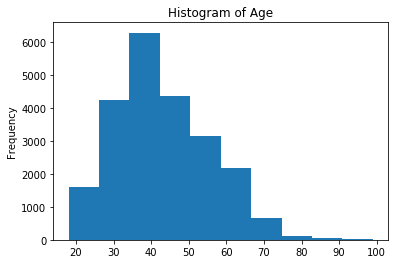

In [25]:
df['Age'].plot.hist();

plt.title('Histogram of Age');

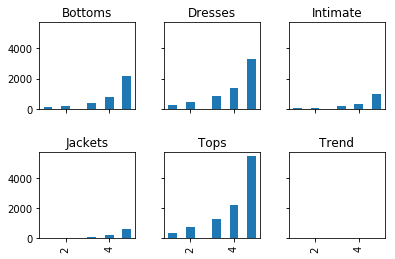

In [26]:
df.hist(column='Rating', by='departmentName', sharex=True, sharey=True, layout=(2,3));

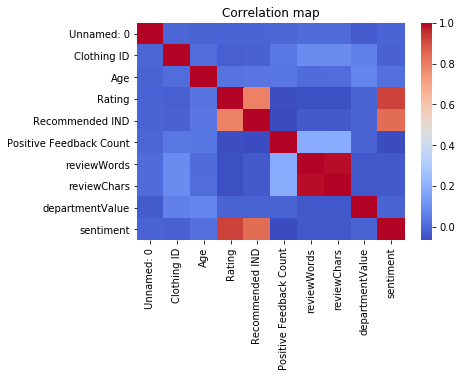

In [27]:
sns.heatmap(df.corr(),cmap='coolwarm');

plt.title('Correlation map');

In [28]:
highDF=df[df.sentiment==2]

highlist=highDF.reviewText.tolist()

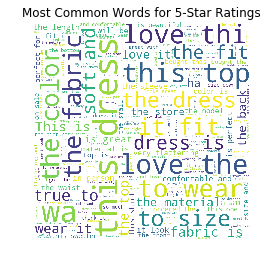

In [29]:
#!pip install wordcloud
from wordcloud import WordCloud
Highwordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white').generate(str(highlist))
# Generate plot
plt.imshow(Highwordcloud)
plt.title('Most Common Words for 5-Star Ratings');
plt.axis("off")
plt.show()

In [30]:
lowDF=df[df.sentiment==0]

lowlist=lowDF.reviewText.tolist()

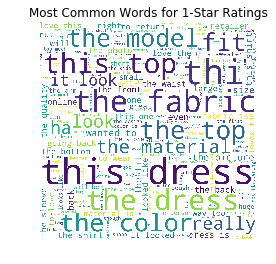

In [31]:
from wordcloud import WordCloud
Lowwordcloud = WordCloud(width = 1200, height = 1200, 
            background_color ='white').generate(str(lowlist))
# Generate plot
plt.imshow(Lowwordcloud)
plt.title('Most Common Words for 1-Star Ratings');
plt.axis("off")
plt.show()

Logistic Regression Final Model

After testing out logistic regression and multinomial NB models with both count vectorizer and tfidf, as well as using the NLTK package polarity method, on the toy dataset only including 1 and 5-star reviews, the logistic regression using count vectorizer scored the best in accuracy, precision, and recall. Therefore, I decided to use the combination of count vectorizer and logistic regression on the full dataset. Unfortunately, one model accuracy decreased once a third tier of rating was added; however, the accuracy is still high and from a business perspective, this model would be more useful than one that excluded average reviews.In order for the model to predict more than two classes, I had to set multi_class to multinomial. Furthermore, the solver had to be changed. I changed the solver to newton-cg, which handles L2 regularization at no penalty. Since the data contains a lot more positive reviews than negative reviews, the false negative rate was a lot higher. Therefore to improve the model, the focus should be on recall.

In [32]:
X=df.reviewText
y=df.sentiment

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#instantiate
vect = CountVectorizer(lowercase=False, ngram_range=(1,3))
#fit
vect.fit(X_train)
#transform
X_train_dtm = vect.transform(X_train)

In [35]:
# transform testing data (using fitted vocabulary) into a document-term matrix (DON'T USE .FIT ON TEST DATA!!!)
X_test_dtm = vect.transform(X_test)
X_all_dtm = vect.transform(X)

In [36]:
# view X_train_dtm as a dense matrix
print(X_train_dtm.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# count how many times EACH token appears across ALL messages in X_train_dtm
import numpy as np
X_train_counts = np.sum(X_train_dtm.toarray(), axis=0)
# store token names
X_train_tokens = vect.get_feature_names()
# create a DataFrame of tokens with their counts
tokenFrame=pd.DataFrame({'token':X_train_tokens, 'count':X_train_counts}).sort_values('count', ascending=True)
tokenFrame.sort_values(by='count', ascending=False).head(20)

In [ ]:
X_train_dtm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression( multi_class='multinomial', solver='newton-cg')
logreg.fit(X_train_dtm, y_train)
y_pred = logreg.predict(X_test_dtm)

In [ ]:
print("The accuracy score is: ",metrics.accuracy_score(y_test, y_pred))

In [ ]:
LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.2, 0.4, 0.6, 0.8, 1.0],
              'fit_intercept' : [True,False],
             'max_iter' : [1000,10000]}

In [ ]:
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train_dtm, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial',C=0.2, solver='newton-cg')
logreg.fit(X_train_dtm, y_train)
y_pred = logreg.predict(X_test_dtm)

In [ ]:
print("The accuracy score is: ",metrics.accuracy_score(y_test, y_pred))

In [ ]:
y_pred_class_all2=logreg.predict(X_all_dtm)

In [ ]:
df['preds_log']=y_pred_class_all2

In [ ]:
# confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

As you can see, there are a lot more false negatives than false positives, due to the fact that there is a lot more training data from 5-star reviews

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect2 = TfidfVectorizer(lowercase=False)
vect2.fit(X_train)
X_train_dtm=vect2.transform(X_train)

In [ ]:
X_test_dtm=vect2.transform(X_test)

In [ ]:
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial',C=0.2, solver='newton-cg')
logreg.fit(X_train_dtm, y_train)
y_pred = logreg.predict(X_test_dtm)

Even after testing out multiple parameters, Tfidf is less accurate than Count Vectorizer

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

In [ ]:
y_pred_class_all2=logreg.predict(X_all_dtm)

In [ ]:
df['preds_log_tfidf']=y_pred_class_all2

Ensemble trees

Although I did not try tree-based models on the toy dataset, I was curious about how they would fit a multi-class dataset, so I tried it out. In order to possibly improve this model, I would have had to use a far larger array of possible parameters in the Grid Search. We see that the MSE here is .6, which is extremely large considering the largest possible distance from a correct guess we could experience would be 2.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# grow each tree deep
treereg = DecisionTreeRegressor(max_depth=6,min_samples_split=10)

In [ ]:
treereg

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [2, 4, 6, 8, 10],
              'min_samples_split' : [2, 4, 6, 8, 10]}

In [ ]:
grid_search = GridSearchCV(treereg, param_grid, cv=5)
grid_search.fit(X_train_dtm, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
treereg.fit(X_train_dtm, y_train)
y_pred = treereg.predict(X_test_dtm)

In [ ]:
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=50, bootstrap=True, oob_score=True, random_state=42)

In [ ]:
bagreg.fit(X_train_dtm, y_train)
y_pred = bagreg.predict(X_test_dtm)

In [ ]:
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
#very high error given the options are only 0 or 1--predicting wrong almost 50% of th time

Multinomial NB

I tested out Multinomial NM because it is commonly used in text-classification problems because it is intuitive and considers conditional probability. However, the independence assumption is difficult to realistically assume in the case of the English language. This simple algorithm performed extremely well in all regards; however, logistic regression was slightly better. Metrics for accuracy, precision, and recall were all above .93.

In [ ]:
df['sentiment_r']=df['Rating'].map({1:0, 2:2, 4:2, 5:1, 3:2})

In [ ]:
df.drop(df[df['sentiment_r']==2].index,inplace=True)

In [ ]:
X=df.reviewText
y=df.sentiment_r

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#instantiate
vect = CountVectorizer()
#fit
vect.fit(X_train)
#transform
X_train_dtm = vect.transform(X_train)

In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix (DON'T USE .FIT ON TEST DATA!!!)
X_test_dtm = vect.transform(X_test)
X_all_dtm = vect.transform(X)

In [ ]:
# view X_train_dtm as a dense matrix
print(X_train_dtm.toarray())

In [ ]:
#when adding 'stop_words='english'' or capitalization='True', score decreased

In [ ]:
# count how many times EACH token appears across ALL messages in X_train_dtm
import numpy as np
X_train_counts = np.sum(X_train_dtm.toarray(), axis=0)
X_train_counts

In [ ]:
# store token names
X_train_tokens = vect.get_feature_names()

In [ ]:
# create a DataFrame of tokens with their counts
tokenFrame=pd.DataFrame({'token':X_train_tokens, 'count':X_train_counts}).sort_values('count', ascending=True)

In [ ]:
tokenFrame.sort_values(by='count', ascending=False).head(20)

In [ ]:
# train a Naive Bayes model using X_train_dtm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
y_pred_class_all=nb.predict(X_all_dtm)

In [ ]:
df['preds_nb']=y_pred_class_all

In [ ]:
df.head(5)

In [ ]:
# confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_class))

In [ ]:
# calculate null accuracy
y_test_binary = np.where(y_test==1, 1, 0)
print(y_test_binary.mean())
print(1 - y_test_binary.mean())

In [ ]:
# calculate accuracy of class predictions
print(metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
print(metrics.recall_score(y_test, y_pred_class))

In [ ]:
print(metrics.precision_score(y_test, y_pred_class))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

In [ ]:
#find most common words for FN
FP=pd.DataFrame(X_test[y_test < y_pred_class])

In [ ]:
FP

In [ ]:
#find most common words for FP
FN=pd.DataFrame(X_test[y_test > y_pred_class])

In [ ]:
FN

Logistic Regression

I tested this algorithm since it is less prone to overfitting, especially in smaller datasets such as this one. It is also simple to understand.This was the highest-performing algorithm in terms of accuracy, precision, and recall. Metrics for accuracy, precision, and recall were all above .95.

In [ ]:
###when only 0 and 1, best features were max_iter=10, fit_intercept=False)

In [ ]:
logreg2 = LogisticRegression()
logreg2.fit(X_train_dtm, y_train)
y_pred = logreg2.predict(X_test_dtm)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.2, 0.4, 0.6, 0.8, 1.0],
              'fit_intercept' : [True,False],
             'max_iter' : [10,100,1000]}

In [ ]:
grid_search = GridSearchCV(logreg2, param_grid, cv=5)
grid_search.fit(X_train_dtm, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
logreg2 = LogisticRegression(fit_intercept=False,max_iter=10)
logreg2.fit(X_train_dtm, y_train)
y_pred = logreg2.predict(X_test_dtm)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(metrics.precision_score(y_test, y_pred))

In [ ]:
print(metrics.recall_score(y_test, y_pred))

In [ ]:
y_pred_class_all=logreg2.predict(X_all_dtm)

In [ ]:
df['preds_log2']=y_pred_class_all

In [ ]:
df[(df.preds_log2)==(df.sentiment_r)].sentiment_r.count()/df.sentiment_r.count()

Textblob Feature Engineering

I wanted to try out the NLTK toolkit and see how my models compare to the built in polarity functions. However, this was the lowest performing algorithm at a base level. The comparison came from mapping negative predictions to 0 and positive predictions to 1.

In [ ]:
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

In [ ]:
df.head(5)

In [ ]:
#load the descriptions into textblob
desc_blob = [TextBlob(desc) for desc in df['reviewText']]

In [ ]:
df['blob']=df.reviewText.apply(TextBlob)

In [ ]:
# #lemmatize blobs
word_blob=[Word(desc) for desc in df['blob']]
df['blob_l']= [b.lemmatize() for b in word_blob]

In [ ]:
df.head()

In [ ]:
#add the sentiment metrics to the dataframe
df['reviewPol'] = [b.sentiment.polarity for b in desc_blob]
df['reviewSubj'] = [b.sentiment.subjectivity for b in desc_blob]
#show dataframe
df.head(3)

In [ ]:
#sentiment metrics for lemmatized words
df['reviewPol_l'] = [b.sentiment.polarity for b in df.blob_l]
df['reviewSubj_l'] = [b.sentiment.subjectivity for b in df.blob_l]
#show dataframe
df.head(3)

Lemmatizing does not increase the number of correct predictions in this case. This may be due to the length and count of reviews.

In [ ]:
df[df[(df.reviewPol)!=(df.reviewPol_l)]].reviewPol.count()

In [ ]:
df.head(5)

In [ ]:
(df.sentiment==1).count()

In [ ]:
# % of reviews with sentiment 1 and high polarity
df.reviewPol.plot.hist()

In [ ]:
df.reviewPol.mean()

In [ ]:
df['pol_bi'] = df['reviewPol'].apply(lambda x: 1 if x >0 else 0)

In [ ]:
df.head(2)

TfIdf Attempt

I fit a Tfidf vectorizer to the same logistic regression and multinomla NM models I ran above. In both cases, the Count Vectorizer performed better.

In [ ]:
# TfidfVectorizerz

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect2 = TfidfVectorizer()
vect2.fit(X_train)
X_train_dtm=vect2.transform(X_train)

In [ ]:
X_test_dtm=vect2.transform(X_test)

In [ ]:
X_train_counts_2 = np.sum(X_train_dtm.toarray(), axis=0)

In [ ]:
X_train_tokens_2 = vect2.get_feature_names()

In [ ]:
# create a DataFrame of tokens with their counts
tokenFrame2=pd.DataFrame({'token':X_train_tokens_2, 'count':X_train_counts_2}).sort_values('count', ascending=True)

In [ ]:
tokenFrame2.sort_values(by='count', ascending=False).head(20)

In [ ]:
X_test_dtm = vect2.transform(X_test)

In [ ]:
#using same Multinomial NB as before
from sklearn.naive_bayes import MultinomialNB
nb2 = MultinomialNB()
nb2.fit(X_train_dtm, y_train)
y_pred_class = nb2.predict(X_test_dtm)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_class))

In [ ]:
print(metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
print(metrics.recall_score(y_test, y_pred_class))

In [ ]:
print(metrics.precision_score(y_test, y_pred_class))

In [ ]:
df.head(2)

In [ ]:
logreg2=LogisticRegression()
logreg2 = LogisticRegression(fit_intercept=False,max_iter=10)
logreg2.fit(X_train_dtm, y_train)
y_pred = logreg2.predict(X_test_dtm)

In [ ]:
#worse score when TfIdf is used
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(metrics.recall_score(y_test, y_pred))

In [ ]:
print(metrics.precision_score(y_test, y_pred))

Textblob Feature Engineering

I wanted to try out the NLTK toolkit and see how my models compare to the built in polarity functions. However, this was the lowest performing algorithm at a base level. The comparison came from mapping negative predictions to 0 and positive predictions to 1.

In [ ]:
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

In [ ]:
df.head(5)

In [ ]:
#load the descriptions into textblob
desc_blob = [TextBlob(desc) for desc in df['reviewText']]

In [ ]:
df['blob']=df.reviewText.apply(TextBlob)

In [ ]:
# #lemmatize blobs
word_blob=[Word(desc) for desc in df['blob']]
df['blob_l']= [b.lemmatize() for b in word_blob]

In [ ]:
df.head(5)

In [ ]:
#add the sentiment metrics to the dataframe
df['reviewPol'] = [b.sentiment.polarity for b in desc_blob]
df['reviewSubj'] = [b.sentiment.subjectivity for b in desc_blob]
#show dataframe
df.head(3)

In [ ]:
#sentiment metrics for lemmatized words
df['reviewPol_l'] = [b.sentiment.polarity for b in df.blob_l]
df['reviewSubj_l'] = [b.sentiment.subjectivity for b in df.blob_l]
#show dataframe
df.head(3)

Lemmatizing does not increase the number of correct predictions in this case. This may be due to the length and count of reviews.

In [ ]:
df[df[(df.reviewPol)!=(df.reviewPol_l)]].reviewPol.count()

In [ ]:
df.head(5)

In [ ]:
(df.sentiment==1).count()

In [ ]:
# percent of reviews with sentiment 1 and high polarity
df.reviewPol.plot.hist()

In [ ]:
df.reviewPol.mean()

In [ ]:
df['pol_bi'] = df['reviewPol'].apply(lambda x: 1 if x >0 else 0)

In [ ]:
print(metrics.accuracy_score(df.sentiment_r, df.pol_bi))

In [ ]:
df.head(5)

Next steps: 
1. Deploy using Flask
2. Deploy on an EC2 instance using AWS